# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [47]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [48]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [49]:
# Rows and Columns
print("Data shape:", data.shape)
print("--------------------")

# Check for NaN values
print("NaN values:\n", data.isnull().sum())
print("--------------------")

# Check for duplicates
print("Duplicates:", data.duplicated().sum())
print("--------------------")

# Print the data types
print("Data types:\n", data.dtypes)
print("--------------------")

# Print the first 5 rows of the data
print("First 5 rows:\n", data.head())
print("--------------------")

Data shape: (5391, 6)
--------------------
NaN values:
 Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64
--------------------
Duplicates: 0
--------------------
Data types:
 Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object
--------------------
First 5 rows:
    Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $2

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [50]:
# Convert `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by 
# removing `$` signs and `,`
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'].str.replace(',', '').str.replace('$', ''))
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'].str.replace(',', '').str.replace('$', ''))
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'].str.replace(',', '').str.replace('$', ''))

# Print the data types and the first 5 rows of the data
print("Data types:\n", data.dtypes)
print("--------------------")
print("First 5 rows:\n", data.head())

Data types:
 Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object
--------------------
First 5 rows:
    Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation                 110000   
1  5140     5/9/1916                     Intolerance                 385907   
2  5230   12/24/1916    20,000 Leagues Under the Sea                 200000   
3  5299    9/17/1920  Over the Hill to the Poorhouse                 100000   
4  5222     1/1/1925                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000  


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [51]:
# convert Release_Date to datetime
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
print(data.dtypes)

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [52]:
# Average production budget
print("Average production budget: ", data['USD_Production_Budget'].mean())
print("--------------------")

# Average worldwide gross
print("Average worldwide gross: ", data['USD_Worldwide_Gross'].mean())
print("--------------------")

# Average domestic gross
print("Average domestic gross: ", data['USD_Domestic_Gross'].mean())
print("--------------------")

# Bottom 25% of production budget
print("Bottom 25% of production budget: ", data['USD_Production_Budget'].quantile(0.25))
print("--------------------")

# Highest production budget movies
print("Highest production budget movies: ", data['USD_Production_Budget'].sort_values(ascending=False).head())
print("--------------------")

# Highest worldwide gross movies
print("Highest worldwide gross movies: ", data['USD_Worldwide_Gross'].sort_values(ascending=False).head())
print("--------------------")

# Revenue of the highest production budget movie
print("Revenue of the highest production budget movie: ", data['USD_Worldwide_Gross'].max())
print("--------------------")

Average production budget:  31113737.57837136
--------------------
Average worldwide gross:  88855421.96271564
--------------------
Average domestic gross:  41235519.44314598
--------------------
Bottom 25% of production budget:  5000000.0
--------------------
Highest production budget movies:  3529    425000000
5079    306000000
2911    300000000
4925    300000000
4333    275000000
Name: USD_Production_Budget, dtype: int64
--------------------
Highest worldwide gross movies:  3529    2783918982
1034    2207615668
5079    2058662225
5077    1671640593
4131    1519479547
Name: USD_Worldwide_Gross, dtype: int64
--------------------
Revenue of the highest production budget movie:  2783918982
--------------------


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [53]:
# How many films grossed $0 domestically
print("How many films grossed $0 domestically: ", data[data['USD_Domestic_Gross'] == 0].shape[0])

How many films grossed $0 domestically:  512


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [54]:
# How many films grossed $0 worldwide
print("How many films grossed $0 worldwide: ", data[data['USD_Worldwide_Gross'] == 0].shape[0])

How many films grossed $0 worldwide:  357


### Filtering on Multiple Conditions

In [55]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [56]:
# Use the Pandas .query() function to accomplish the same thing. 
# Create a subset for international releases that had some worldwide gross revenue, 
# but made zero revenue in the United States.
print("How many films grossed $0 domestically but some international: ", data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross > 0').shape[0])

How many films grossed $0 domestically but some international:  155


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [57]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [58]:
# Identify which films were not released yet as of the time of data collection (May 1st, 2018).
print("Films not released yet: ", data[data['Release_Date'] > scrape_date].shape[0])
# made a df without the films not released yet
data_clean = data[data['Release_Date'] <= scrape_date].copy()
data_clean.shape[0]

Films not released yet:  7


5384

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [59]:
# What is the percentage of films where the production costs exceeded the worldwide gross revenue? 
films_loss_money = data_clean[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']].shape[0]
print("Percentage of films where the production costs exceeded the worldwide gross revenue: ", (films_loss_money / data_clean.shape[0])*100)

Percentage of films where the production costs exceeded the worldwide gross revenue:  37.27711738484398


# Seaborn for Data Viz: Bubble Charts

In [60]:
# import seaborn
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



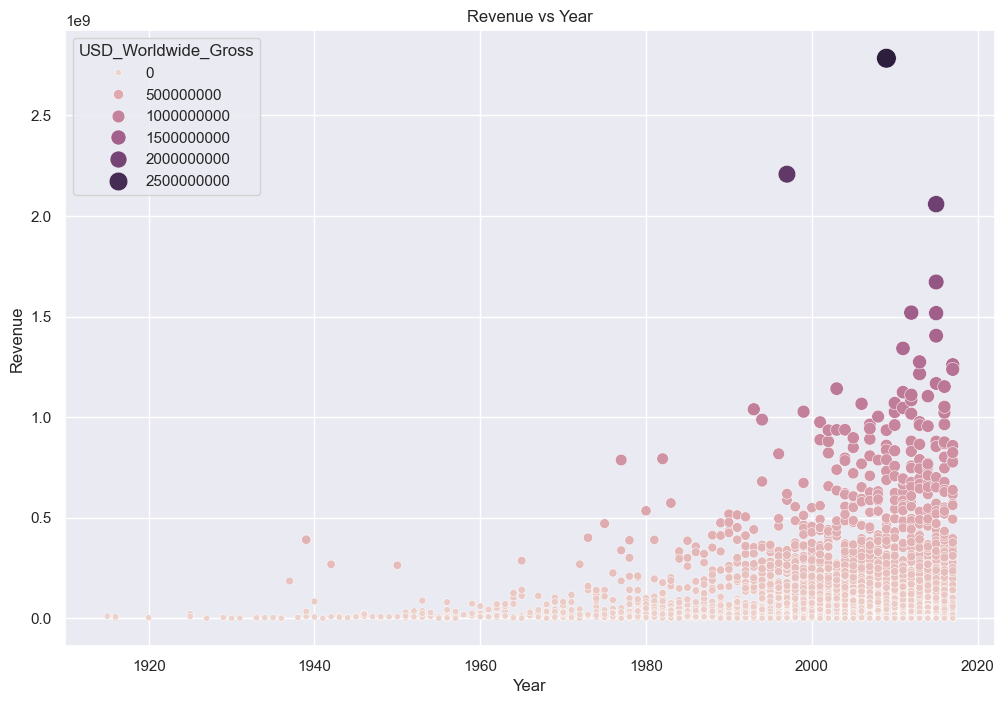

In [61]:
# make a buuble chart using seaborn to show the relationship between USD_Worldwide_Gross per year making the buuble increase in size based on the value
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
plt.title('Revenue vs Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
sns.scatterplot(x=data_clean['Release_Date'].dt.year, y=data_clean['USD_Worldwide_Gross'], hue=data_clean['USD_Worldwide_Gross'], size=data_clean['USD_Worldwide_Gross'], sizes=(20, 200))
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [62]:
decade_of_release = data_clean['Release_Date'].dt.year // 10 * 10
# add decade_of_release to the data_clean df
data_clean['Decade'] = decade_of_release
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [63]:
old_films = data_clean[data_clean['Decade'] < 1970]
new_films = data_clean[data_clean['Decade'] >= 1970]

# how many films were made before 1970
print("Films made before 1970: ", old_films.shape[0])
# most expensive film made before 1970
print("Most expensive film made before 1970: ", old_films['USD_Production_Budget'].max())
# made afeter 1970
print("Films made after 1970: ", new_films.shape[0])

Films made before 1970:  153
Most expensive film made before 1970:  42000000
Films made after 1970:  5231


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

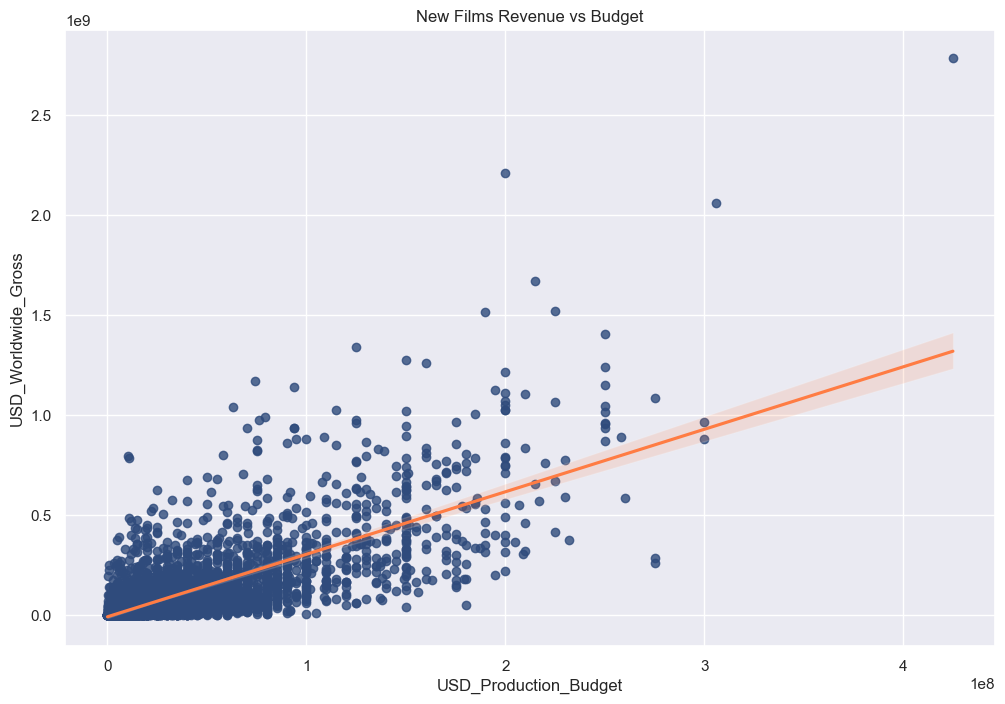

In [64]:
# Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`
# * Put the chart on a `'darkgrid'`.
# * Set limits on the axes so that they don't show negative values.
# * Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
# * Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).
plt.figure(figsize=(12, 8))
plt.title('New Films Revenue vs Budget')
plt.xlabel('Budget in $ millions')
plt.ylabel('Revenue in $ billions')
with sns.axes_style("darkgrid"):
    sns.regplot(data=new_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross', 
                color='#2f4b7c', 
                line_kws={'color': '#ff7c43'})
    

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [65]:
# import scikit-learn
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [66]:
# Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. 
# How much of the variance in movie revenue does the linear model explain in this case?

# create a linear regression object
reg = LinearRegression()

# fit the regression with old_films data
X = old_films[['USD_Production_Budget']]
y = old_films[['USD_Worldwide_Gross']]
reg.fit(X, y)

# print the intercept, slope and r-squared
print('Intercept: ', reg.intercept_[0])
print('Slope: ', reg.coef_[0][0])
print('R-squared: ', reg.score(X, y))


Intercept:  22821538.635080386
Slope:  1.6477131440107315
R-squared:  0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [67]:
# how much global revenue does our model estimate for a film with a budget of $350 million?
print('Estimated global revenue for a film with a budget of $350 million: ', reg.predict([[350000000]])[0][0])

Estimated global revenue for a film with a budget of $350 million:  599521139.0388364


C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
budget = 350000000
revenue_estimate = reg.intercept_[0] + reg.coef_[0,0]*budget
print(f'The estimated revenue for a $350 film is around ${revenue_estimate}.')


The estimated revenue for a $350 film is around $599521139.0388364.
